1)_

  

> ii. Usando 3 subplots, graficar en Python

*   Las soluciones exactas y aproximadas 
*   El error global
*   El error local


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Solucion exacta de la funcion a)
def y(t):
  return t*np.log(t) +2*t

def y_prima(t):
  return 1+(y/t)


#Intervalos
a=1
b=2
h=(b-a)/2 #Punto de paso

y_verdadero=[]
#y_aprox=0

t=a

while a<=t and t<=b:
  y_verdadero.append(y(t))
  t+=h

print(y_verdadero)




[2.0, 3.6081976621622465, 5.386294361119891]




> iii. Implementar todos los métodos del apartado i) en Python. Evalué ambos PVI con valores de h de 10-2, 10-3 y 10-4.

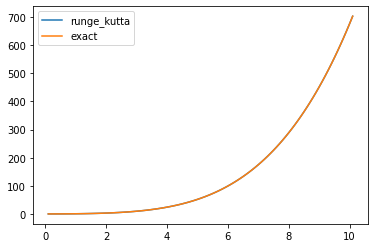

max error 0.00005


In [2]:
#METODO DE RUNGE-KUTTA

import math
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(y, x, dx, f):
    """ y es el valor inicial para y
        x es el valor inicial para x
        dx es el paso de tiempo de x
        f es la derivada de la funcion y(t)
    """
    k1 = dx * f(y, t)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.


def func(y, t): return t * math.sqrt(y)


t = 0.
y = 1.
dt = .1
ys, ts = [], []
    
while t <= 10:
  y = runge_kutta(y, t, dt, func)
  t += dt
  ys.append(y)
  ts.append(t)


#Realizo las graficas
exact = [(t ** 2 + 4) ** 2 / 16. for t in ts]
plt.plot(ts, ys, label='runge_kutta')
plt.plot(ts, exact, label='exact')
plt.legend()
plt.show()
error = np.array(exact) - np.array(ys)
print("max error {:.5f}".format(max(error)))